<a href="https://colab.research.google.com/github/Drashti16N/Israel_palestine_war_analysis/blob/main/israel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing different Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

%matplotlib inline

#Read csv file(data):
df = pd.read_csv("/content/israel_palestine_war.csv")

In [ ]:
#View few records of datasets:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,24-09-2023,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,24-09-2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,24-09-2023,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,24-09-2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,22-09-2023,16.0,Palestinian,Kfar Dan,Jenin,West Bank,22-09-2023,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,20-09-2023,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,20-09-2023,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,19-09-2023,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,19-09-2023,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [ ]:
#Display total number of rows and columns in datasets:
print(df.shape)
print(f"total number of rows: {df.shape[0]}".upper())
print(f"total number of columns: {df.shape[1]}".upper())

(11124, 16)
TOTAL NUMBER OF ROWS: 11124
TOTAL NUMBER OF COLUMNS: 16


In [ ]:
#Display all the column name and their data types:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [ ]:
#Check for null values in datasets:
print(df.isnull().sum())

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64


In [ ]:
#View the mean, std, min, max values of age:
print(df.describe())

                age
count  10995.000000
mean      26.745703
std       13.780548
min        1.000000
25%       19.000000
50%       23.000000
75%       31.000000
max      112.000000



*   The average age of the dead is 26.
*   The youngest among the individuals dead was 1 yeal old baby.
*   The  oldest among the individuals dead was 112 year old.

In [ ]:
#Drop notes column from the dataframe:
df.drop("notes",inplace=True, axis=1)

In [ ]:
#Check the number of columns decreased to 15 from 16:
df.shape

(11124, 15)

**# CLEANING DATASETS:**
* Dealing with NAN values:

In [ ]:
#Fill Nan values of age columns with mean value of age:
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
#Fill Nan values of gender columns with mode of gender:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [ ]:
df.dropna(subset=['took_part_in_the_hostilities'], inplace=True)

In [ ]:
#Fill Nan values of place of residence and district columns with "unknow":
df['place_of_residence'].fillna('Unknown', inplace=True)
df['place_of_residence_district'].fillna('Unknown', inplace=True)

In [ ]:
#Fill the Nan values of type of injury and ammunition columns with "Not specified":
df['type_of_injury'].fillna('Not Specified', inplace=True)
df['ammunition'].fillna('Not Specified', inplace=True)

In [ ]:
#Check that all Nan values are filled or not:
print(df.isnull().sum())

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
dtype: int64


In [ ]:
#View number of rws and columns after data cleaning process:
df.shape

(9694, 15)


*   **Converting date columns to pandas datetime:**

In [ ]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

<ipython-input-16-bbaddbe78dec>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_of_event'] = pd.to_datetime(df['date_of_event'])
<ipython-input-16-bbaddbe78dec>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_of_death'] = pd.to_datetime(df['date_of_death'])


**# DATA VISULIZATION:**

* Age Distribution of Fatalities:

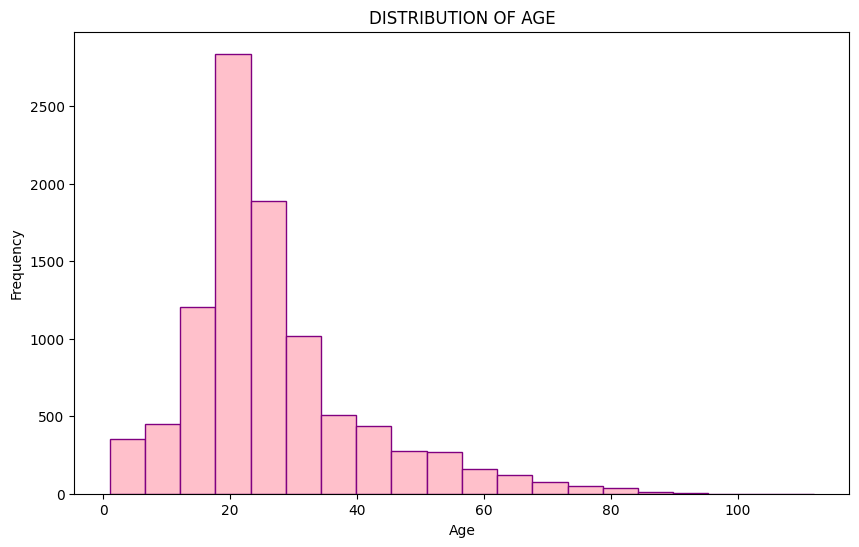

In [ ]:
# Ploting a histogram for the 'age' column:

#set figure size of graph:
plt.figure(figsize=(10, 6))

#create histogram and accordingly give parameters like colour, bins, edgecolour etc:
plt.hist(df['age'], bins=20, color='pink', edgecolor='purple')

#Give title of the graph:
plt.title('Distribution of Age'.upper())

#Give labels to x and y-axis:
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



*   The above graph represents the distribution by age of individuals killed in the war between israel and palestine.
*  From the graph we can say that majority of the peoples that are killed is of the age group 15 to 30. Young peoples are the biggest victims of the war.





*   Distribution of Fatalities by Citizenship:

In [ ]:
#Count and view the total number of peoples of israel and palestine in dataset:
citizenship_counts = df['citizenship'].value_counts()
print(f"citizenship counts:\n{citizenship_counts}".upper())

CITIZENSHIP COUNTS:
PALESTINIAN    8921
ISRAELI         772
JORDANIAN         1
NAME: CITIZENSHIP, DTYPE: INT64


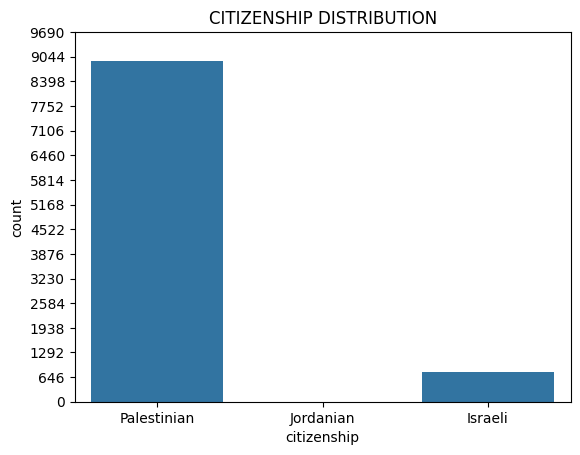

In [ ]:
#plot the number of citizens of israel and palestine:
ax = sns.countplot(x='citizenship', data=df)

#set the partitions of y-axis for better visulization:
num_partitions = 15
ax.set_yticks(range(0, len(df) + 1, len(df) // num_partitions))

#Give title to the plot:
plt.title('Citizenship Distribution'.upper())
plt.show()


*  Distribution of Fatalities by Gender:

In [ ]:
#Replacing the M with "Male" and F with "Female" in gender column for better representation:
df['gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)

In [ ]:
#Count and view the male and females in dataset:
Gender_counts = df['gender'].value_counts()
print(f"Gender_counts:\n{Gender_counts}".upper())

GENDER_COUNTS:
MALE      8369
FEMALE    1325
NAME: GENDER, DTYPE: INT64


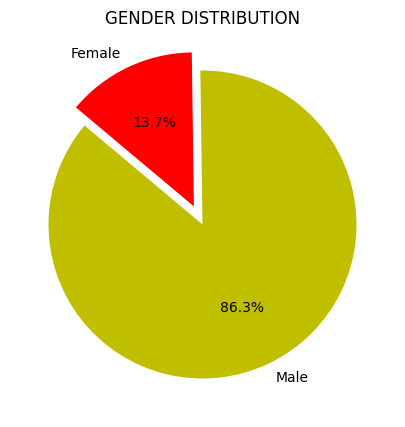

In [ ]:
#creating Pie Chart for Gender Distribution:
#set the figure size for graph:
plt.figure(figsize=(8, 5))

#create pie chart and accordinlgy set parameters like labels, startangle, colors, explode etc:
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['y','r'], explode=[0,0.13])

#Give title to the chart:
plt.title('Gender Distribution'.upper())
plt.show()


* Fatality Trends from 2000 to 2023:

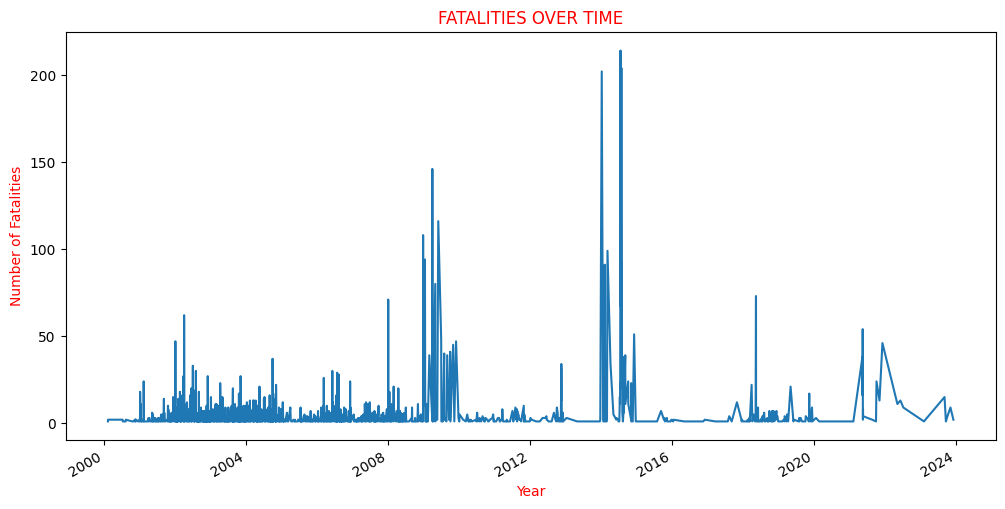

In [ ]:
# Group by date and count the number of fatalities:
fatalities_over_time = df.groupby('date_of_event').size()

# Create a time series plot:
#set figure size:
plt.figure(figsize=(12, 6))
fatalities_over_time.plot()

#Give title to the plot:
plt.title('Fatalities Over Time'.upper(), color= 'r')

#Give labels to x and y-axis:
plt.xlabel('Year',color= 'r')
plt.ylabel('Number of Fatalities',color= 'r')
plt.show()


* Distribution of Place of Residence:

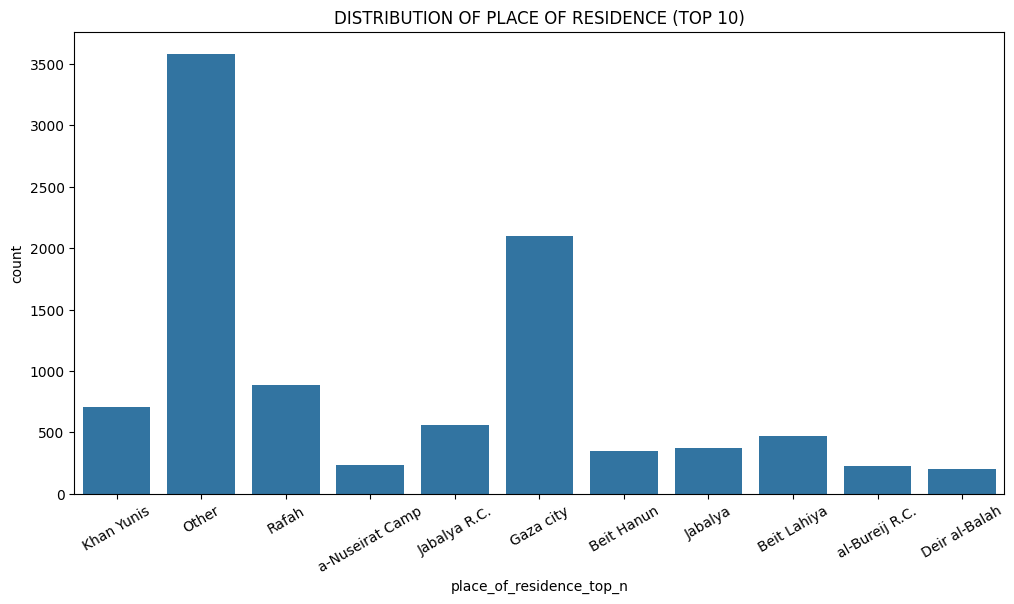

In [ ]:
# Categorical Analysis - Place of Residence (Top N)
a = 10  # Set the number of top categories to display

# Get the top N categories:
a_categories = df['place_of_residence'].value_counts().nlargest(a).index

# Replace less frequent categories with 'Other':
df['place_of_residence_top_n'] = df['place_of_residence'].apply(lambda x: x if x in a_categories else 'Other')

#set figure size:
plt.figure(figsize=(12, 6))
b = sns.countplot(x='place_of_residence_top_n', data=df)

#Give title to the plot:
plt.title('Distribution of Place of Residence (Top {})'.format(a).upper())

#set rotation of the x lables:
plt.xticks(rotation=30)
plt.show()


* Distribution of Types of Injuries:

In [ ]:
# Count the occurrences of each type of injury:
injury = df['type_of_injury'].value_counts()
print(injury)

gunfire             8785
explosion            505
Not Specified        280
shelling              65
house demolition      25
stabbing              18
beating                7
stones throwing        4
hit by a vehicle       4
fire                   1
Name: type_of_injury, dtype: int64


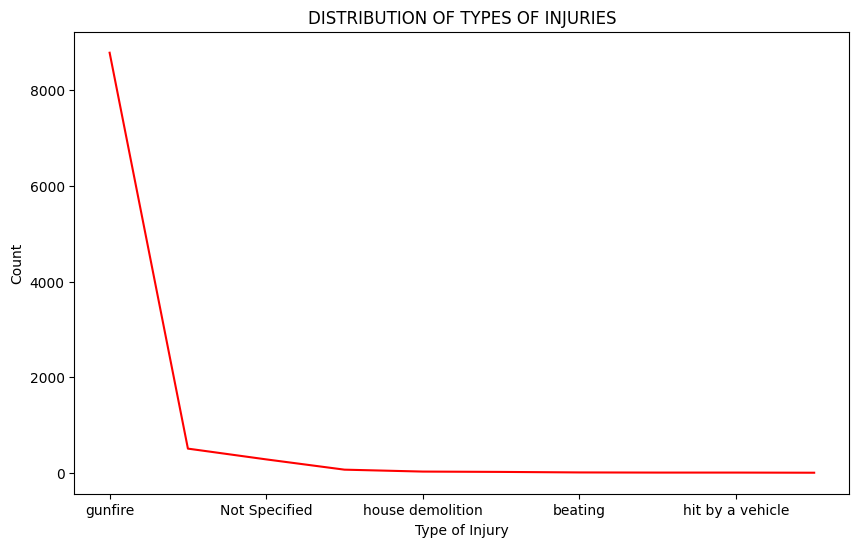

In [ ]:
#plot the line graph of type of injury:
#set figure size:
plt.figure(figsize=(10, 6))

#plot graph and set color to red:
injury.plot( color='red')

#Give title to the plot:
plt.title('Distribution of Types of Injuries'.upper())

#Give labels to x and y-axis:
plt.xlabel('Type of Injury')
plt.ylabel('Count')
plt.show()


* The graph shows the distribution of death with different instruments.
* The graph shows that 91 per cent of deaths were by gunfire.


* Distribution Based on Participation in Hostilities:

In [ ]:
# Count the number of occurrences for each category in 'took_part_in_the_hostilities':
participation_counts = df['took_part_in_the_hostilities'].value_counts()
participation_counts

No                            4653
Yes                           3467
Israelis                       771
Unknown                        603
Object of targeted killing     200
Name: took_part_in_the_hostilities, dtype: int64

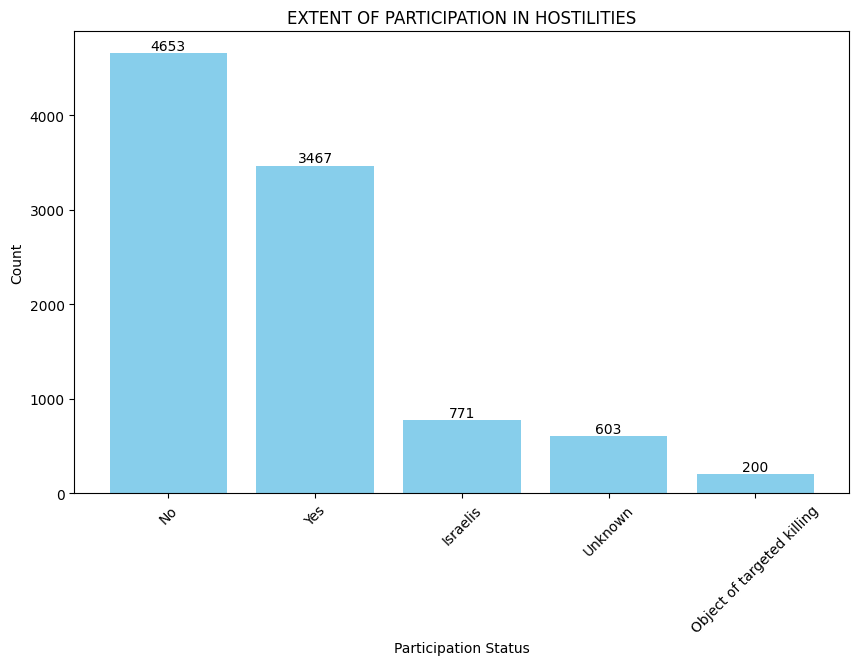

In [ ]:
# Create a bar plot to visualize the extent of participation:
#set figure size:
plt.figure(figsize=(10, 6))
plt.bar(participation_counts.index, participation_counts.values, color='skyblue')

for i, count in enumerate(participation_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

#give title to plot:
plt.title('Extent of Participation in Hostilities'.upper())

#give labels to x and y-axis:
plt.xlabel('Participation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

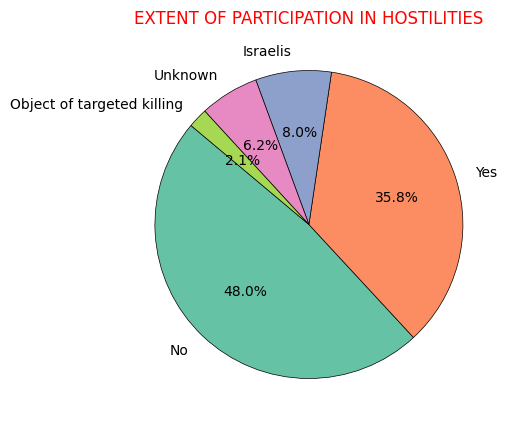

In [ ]:
#Create Pie Chart to visualize the extent of participation:
plt.figure(figsize=(8, 5))
plt.pie(participation_counts, labels=participation_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'),labeldistance=1.13, wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : 'black' })
plt.title('Extent of Participation in Hostilities'.upper(),color='r')
plt.show()


*  The graph shows that the majority of the dead had no participation in
the hostilities, accounting for 48 per cent of the total dead.
*  Next, we can see that 36 per cent of the dead took part in the hostilities.

* Also 6 per cent are not known, 8 per cent were killed by the Israelis, while 2 per cent of the dead were targeted.


* Type of ammunition and means of killing:

In [ ]:
# Count and view the occurrences of each type of ammunition and means of killing:
ammunition_counts = df['ammunition'].value_counts()
means_of_killing_counts = df['killed_by'].value_counts()

print(f"Ammunition used:\n{ammunition_counts}".upper())

print(f"\nMeans of killing:\n{means_of_killing_counts}".upper())

AMMUNITION USED:
NOT SPECIFIED                  4888
MISSILE                        2847
SHELL                           675
LIVE AMMUNITION                 606
EXPLOSIVE BELT                  315
BOMB                            213
MORTAR FIRE                      43
FLECHETTE SHELLS                 22
PHOSPHORUS SHELL                 16
CAR BOMB                         15
KNIFE                            14
RUBBER-COATED METAL BULLETS      13
TEARGAS CANISTER                 11
QASSAM ROCKET                     7
GRAD ROCKET                       5
GRENADE                           2
FLARE BOMB                        1
STUN GRENADE                      1
NAME: AMMUNITION, DTYPE: INT64

MEANS OF KILLING:
ISRAELI SECURITY FORCES    8876
PALESTINIAN CIVILIANS       771
ISRAELI CIVILIANS            47
NAME: KILLED_BY, DTYPE: INT64


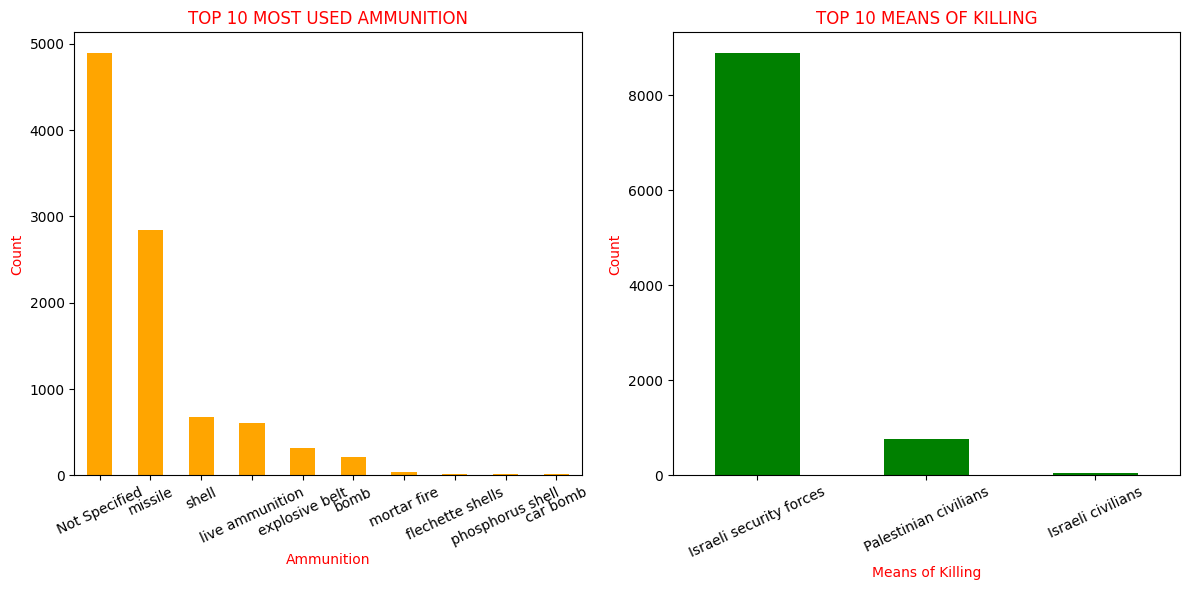

In [ ]:
#create two bar plots of most used ammunition and means of killing:
#set figure size:
plt.figure(figsize=(12, 6))

# Plot ammunition:
plt.subplot(1, 2, 1)
ammunition_counts.head(10).plot(kind='bar', color='orange')

#Give title to plot:
plt.title('Top 10 Most Used Ammunition'.upper(),color= 'r')

#Give labels to x and y-axis:
plt.xlabel('Ammunition',color= 'r')
plt.xticks(rotation=25)
plt.ylabel('Count',color= 'r')

# Plot means of killing:
plt.subplot(1, 2, 2)
means_of_killing_counts.head(10).plot(kind='bar', color='green')

#Give title to plot:
plt.title('Top 10 Means of Killing'.upper(),color= 'r')

#Give labels to x and y-axis:
plt.xlabel('Means of Killing',color= 'r')
plt.xticks(rotation=25)
plt.ylabel('Count',color= 'r')

plt.tight_layout()
plt.show()


* The above graph shows the distributions of aummunition and means of killing.



* Distribution of Fatalities by District:

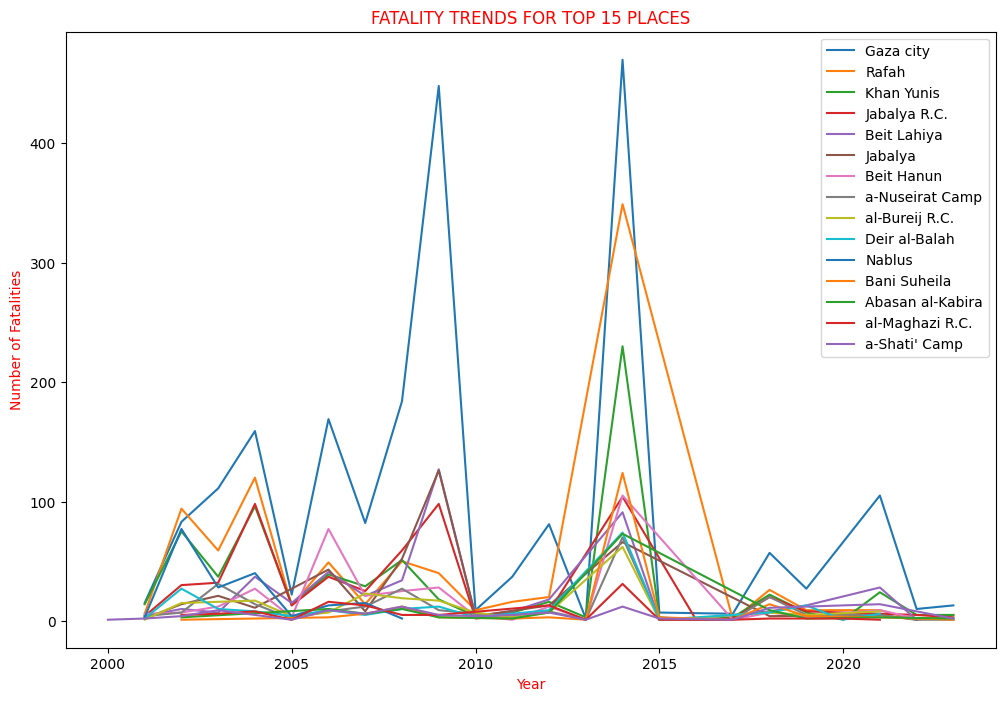

In [ ]:
df['year'] = df['date_of_event'].dt.year

# Choose the top N places to focus on:
top_n_places = 15

# Get the top N places with the highest total fatalities:
top_places = df['place_of_residence'].value_counts().nlargest(top_n_places).index

# Filter the data to include only the top N places:
filtered_data = df[df['place_of_residence'].isin(top_places)]

# Group by place and year, and sum the number of fatalities:
fatalities_by_place = filtered_data.groupby(['place_of_residence', 'year']).size().reset_index(name='fatalities_count')

# Create a line plot for each place:
plt.figure(figsize=(12, 8))
for place in top_places:
    data = fatalities_by_place[fatalities_by_place['place_of_residence'] == place]
    plt.plot(data['year'], data['fatalities_count'], label=place)

#Give title and labels to the axis of the plot:
plt.title(f'Fatality Trends for Top {top_n_places} Places'.upper(),color= 'r')
plt.xlabel('Year',color= 'r')
plt.ylabel('Number of Fatalities',color= 'r')
plt.legend()
plt.show()



* The above graph shows the trend of number of deaths over the years of different districts(area).


* Representation of major districts on map:

In [ ]:
#Defining the approximate coordinates for major districts:
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286],
    'Tubas':[32.3211, 35.3700],
    'North Gaza':[31.5417, 34.5196],
    'Ramallah and al-Bira':[31.9486, 35.1709],
    'al-Quds':[31.7683, 35.2137],
    'Deir al-Balah':[31.4171, 34.3509]
}
# Get fatality counts for each district:
district_fatalities = df.groupby('event_location_district').size()

# Function to determine the color of the circle based on the number of fatalities:
def get_color(fatalities):
    if fatalities > 500:
        return 'darkred'
    elif fatalities > 100:
        return 'red'
    elif fatalities > 50:
        return 'orange'
    else:
        return 'green'

# Create a base map centered around the region:
m = folium.Map(location=[31.5, 34.75], zoom_start=8, tiles='OpenStreetMap')

# Add markers and circles for districts:
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'{district}: {fatalities} fatalities',
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 1000,  # scale radius for better visualization
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.6,
    ).add_to(m)

# Add layer control:
folium.LayerControl().add_to(m)
m

Palestine:

In [ ]:
#Extract palestian data:
palestinian_data = df[df['citizenship'] == 'Palestinian']
a = palestinian_data['date_of_event'].tolist()

In [ ]:
palestinian_data

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,place_of_residence_top_n,year
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-09-19,Male,No,Khan Yunis,Khan Yunis,gunfire,live ammunition,Israeli security forces,Khan Yunis,2023
94,Iyad al-'Abed al-Hasani,2023-12-05,51.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-12-05,Male,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces,Other,2023
95,Muhammad Walid Muhammad 'Abd al-'Aal,2023-12-05,33.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-12-05,Male,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces,Other,2023
96,'Ali Hassan Muhammad Ghali,2023-11-05,49.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-11-05,Male,Yes,Khan Yunis,Khan Yunis,gunfire,missile,Israeli security forces,Khan Yunis,2023
98,Mahmoud Walid Mahmoud 'Abd al-Jawad,2023-11-05,25.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-11-05,Male,Yes,Rafah,Rafah,gunfire,missile,Israeli security forces,Rafah,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,Muhammad Hamed 'Ali Shalash,2000-12-17,18.0,Palestinian,'Abud,Ramallah and al-Bira,West Bank,2000-12-17,Male,No,Shuqba,Ramallah and al-Bira,gunfire,Not Specified,Israeli civilians,Other,2000
11098,Muhammad Judah Abu 'Aasi,2000-07-12,27.0,Palestinian,Erez (Industrial Zone),North Gaza,Gaza Strip,2000-07-12,Male,Yes,a-Shati' Camp,Gaza,gunfire,live ammunition,Israeli civilians,Other,2000
11110,Mustafa Mahmoud Musa 'Alian,2000-11-14,47.0,Palestinian,Kafr Malik,Ramallah and al-Bira,West Bank,2000-11-14,Male,No,Askar R.C.,Nablus,stones throwing,Not Specified,Israeli civilians,Other,2000
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,Male,Unknown,Beit Furik,Nablus,gunfire,Not Specified,Israeli civilians,Other,2000


In [ ]:
#Make list of only year from entire date:
b = []
for i in a:
  b.append(str(i)[0:4])
print(b)

['2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021',

In [ ]:
palestinian_data['Year'] = b

<ipython-input-37-af846b68d406>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palestinian_data['Year'] = b


In [ ]:
#make one list of year and another list of count of death in palestine:
list_1= []
list_2= []
for i in range(2000,2024):
  list_1.append(i)
  list_2.append(b.count(str(i)))
print(list_1)
print(list_2)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[6, 192, 1034, 587, 829, 190, 665, 385, 637, 1018, 68, 105, 248, 10, 2219, 23, 8, 27, 257, 107, 4, 237, 33, 32]


In [ ]:
#Make dataframe of year and count of death in palestine:
Df_new = pd.DataFrame({'Year':list_1,'count':list_2})
print(Df_new)

    Year  count
0   2000      6
1   2001    192
2   2002   1034
3   2003    587
4   2004    829
5   2005    190
6   2006    665
7   2007    385
8   2008    637
9   2009   1018
10  2010     68
11  2011    105
12  2012    248
13  2013     10
14  2014   2219
15  2015     23
16  2016      8
17  2017     27
18  2018    257
19  2019    107
20  2020      4
21  2021    237
22  2022     33
23  2023     32


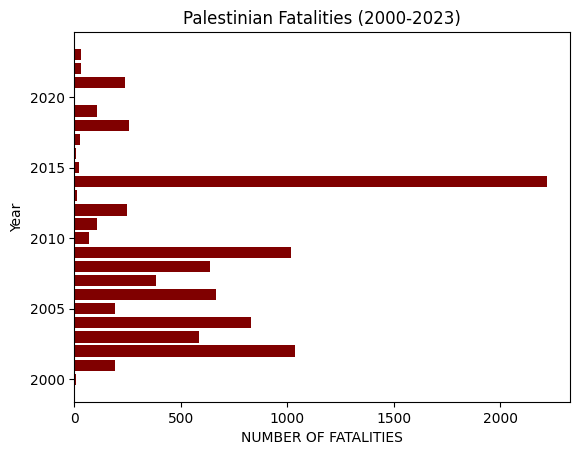

In [ ]:
# creating the bar plot of deaths in palestine:
plt.barh(Df_new['Year'], Df_new['count'], color ='maroon')

#Give title and labels to x and y-axis:
plt.xlabel("Number of Fatalities".upper())
plt.ylabel("Year")
plt.title("Palestinian Fatalities (2000-2023)")
plt.show()


* 1. The above graph shows the total number of deaths over years in palestine.

Israel

In [ ]:
#Extract israel data:
israel_data = df[df['citizenship'] == 'Israeli']
c = israel_data['date_of_event'].tolist()

In [ ]:
#Make list of only year from entire date:
d = []
for j in c:
  d.append(str(j)[0:4])
print(d)

['2013', '2012', '2012', '2012', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2010', '2010', '2010', '2010', '2010', '2010', '2009', '2008', '2008', '2008', '2008', '2007', '2007', '2006', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2004',

In [ ]:
israel_data['Year'] = d

<ipython-input-43-bc25a5e91dff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  israel_data['Year'] = d


In [ ]:
#make one list of year and another list of count of death in israel:
list_3= []
list_4= []
for j in range(2000,2024):
  list_3.append(j)
  list_4.append(d.count(str(j)))
print(list_3)
print(list_4)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[29, 159, 291, 145, 99, 20, 1, 2, 4, 1, 6, 11, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#Make dataframe of year and count of death in israel:
Df_i = pd.DataFrame({'Year':list_3,'count':list_4})
print(Df_i)

    Year  count
0   2000     29
1   2001    159
2   2002    291
3   2003    145
4   2004     99
5   2005     20
6   2006      1
7   2007      2
8   2008      4
9   2009      1
10  2010      6
11  2011     11
12  2012      3
13  2013      1
14  2014      0
15  2015      0
16  2016      0
17  2017      0
18  2018      0
19  2019      0
20  2020      0
21  2021      0
22  2022      0
23  2023      0


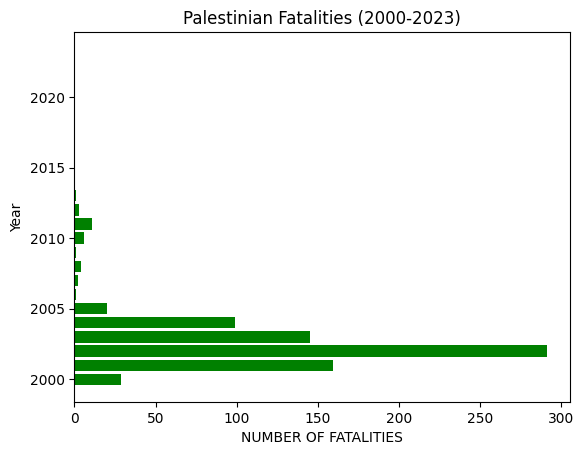

In [ ]:
# creating the bar plot of death in israel:
plt.barh(Df_i['Year'], Df_i['count'], color ='green')

#Give title and labels to x and y-axis of the plot:
plt.xlabel("Number of Fatalities".upper())
plt.ylabel("Year")
plt.title("Palestinian Fatalities (2000-2023)")
plt.show()


* 1. The above graph shows the total number of deaths over years in israel.

# **Use of 2nd dataset for GDP analysis of isreal and palestine:**

In [ ]:
#Read and view csv file of dataset:
df_1 = pd.read_csv("/content/Israel-Palestine_gdp.csv")
df_1.head()

,Year,Country,GDP (in USD),Population,GDP Growth Rate (%),Fertility Rate,"Infant Mortality Rate (per 1,000 live births)","Maternal Mortality Rate (per 100,000 live births)",Agricultural Output (in USD),Active Military Personnel,Reserve Military Personnel,Literacy Rate (%),IT Output (in USD),Number of Tanks,Number of Submarines,Number of Armoured Vehicles
0,2000,Israel,132.02 billion,"60,49,000",5.18,2.89,5.0,7.2,5.71 billion,"1,68,000","4,45,000",97.1,6.78 billion,"2,760",3.0,"10,760"
1,2000,Palestine,4.56 billion,"33,74,000",5.33,5.36,24.6,26.0,880 million,NaN,NaN,90.3,0.115 billion,NaN,NaN,NaN
2,2001,Israel,131.02 billion,"61,65,000",-0.47,2.89,4.8,6.7,5.17 billion,"1,66,500","4,45,000",97.5,6.89 billion,"2,791",3.0,"10,814"
3,2001,Palestine,4.59 billion,"34,00,000",-50.00,5.22,22.5,24.4,925 million,NaN,NaN,90.8,0.122 billion,NaN,NaN,NaN
4,2002,Israel,126.64 billion,"62,63,000",-0.35,2.98,4.6,5.9,4.76 billion,"1,63,000","3,75,000",97.9,7.02 billion,"2,821",3.0,"10,885"


In [ ]:
#Display total number of rows and columns in datasets:
print(df_1.shape)
print(f"total number of rows: {df_1.shape[0]}".upper())
print(f"total number of columns: {df_1.shape[1]}".upper())

(48, 16)
TOTAL NUMBER OF ROWS: 48
TOTAL NUMBER OF COLUMNS: 16


In [ ]:
#Display all the column name and their data types:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               48 non-null     int64  
 1   Country                                            48 non-null     object 
 2   GDP (in USD)                                       48 non-null     object 
 3   Population                                         44 non-null     object 
 4   GDP Growth Rate (%)                                48 non-null     float64
 5   Fertility Rate                                     48 non-null     float64
 6   Infant Mortality Rate (per 1,000 live births)      48 non-null     float64
 7   Maternal Mortality Rate (per 100,000 live births)  46 non-null     float64
 8   Agricultural Output (in USD)                       44 non-null     object 
 9   Active Milit


* changing data types:

In [ ]:
#Changing datatypes to float:
def obj_to_float(i):
    if 'million' in i.lower():
        return float(i.replace('million',''))*1e6
    elif 'billion' in i.lower():
        return float(i.replace('billion',''))*1e9
    else: None


df_1['GDP (in USD)'] = df_1['GDP (in USD)'].apply(lambda x:obj_to_float(str(x)))
df_1['Agricultural Output (in USD)'] = df_1['Agricultural Output (in USD)'].apply(lambda x:obj_to_float(str(x)))
df_1['IT Output (in USD)'] = df_1['IT Output (in USD)'].apply(lambda x:obj_to_float(str(x)))

df_1.head()

,Year,Country,GDP (in USD),Population,GDP Growth Rate (%),Fertility Rate,"Infant Mortality Rate (per 1,000 live births)","Maternal Mortality Rate (per 100,000 live births)",Agricultural Output (in USD),Active Military Personnel,Reserve Military Personnel,Literacy Rate (%),IT Output (in USD),Number of Tanks,Number of Submarines,Number of Armoured Vehicles
0,2000,Israel,1.320200e+11,"60,49,000",5.18,2.89,5.0,7.2,5.710000e+09,"1,68,000","4,45,000",97.1,6.780000e+09,"2,760",3.0,"10,760"
1,2000,Palestine,4.560000e+09,"33,74,000",5.33,5.36,24.6,26.0,8.800000e+08,NaN,NaN,90.3,1.150000e+08,NaN,NaN,NaN
2,2001,Israel,1.310200e+11,"61,65,000",-0.47,2.89,4.8,6.7,5.170000e+09,"1,66,500","4,45,000",97.5,6.890000e+09,"2,791",3.0,"10,814"
3,2001,Palestine,4.590000e+09,"34,00,000",-50.00,5.22,22.5,24.4,9.250000e+08,NaN,NaN,90.8,1.220000e+08,NaN,NaN,NaN
4,2002,Israel,1.266400e+11,"62,63,000",-0.35,2.98,4.6,5.9,4.760000e+09,"1,63,000","3,75,000",97.9,7.020000e+09,"2,821",3.0,"10,885"


In [ ]:
cols = ['Population', 'Active Military Personnel', 'Reserve Military Personnel','Number of Tanks','Number of Armoured Vehicles']
for i in cols:
    df_1[i]=df_1[i].str.replace(",",'').astype(float)

df_1.head()

,Year,Country,GDP (in USD),Population,GDP Growth Rate (%),Fertility Rate,"Infant Mortality Rate (per 1,000 live births)","Maternal Mortality Rate (per 100,000 live births)",Agricultural Output (in USD),Active Military Personnel,Reserve Military Personnel,Literacy Rate (%),IT Output (in USD),Number of Tanks,Number of Submarines,Number of Armoured Vehicles
0,2000,Israel,1.320200e+11,6049000.0,5.18,2.89,5.0,7.2,5.710000e+09,168000.0,445000.0,97.1,6.780000e+09,2760.0,3.0,10760.0
1,2000,Palestine,4.560000e+09,3374000.0,5.33,5.36,24.6,26.0,8.800000e+08,NaN,NaN,90.3,1.150000e+08,NaN,NaN,NaN
2,2001,Israel,1.310200e+11,6165000.0,-0.47,2.89,4.8,6.7,5.170000e+09,166500.0,445000.0,97.5,6.890000e+09,2791.0,3.0,10814.0
3,2001,Palestine,4.590000e+09,3400000.0,-50.00,5.22,22.5,24.4,9.250000e+08,NaN,NaN,90.8,1.220000e+08,NaN,NaN,NaN
4,2002,Israel,1.266400e+11,6263000.0,-0.35,2.98,4.6,5.9,4.760000e+09,163000.0,375000.0,97.9,7.020000e+09,2821.0,3.0,10885.0


In [ ]:
#Check changed data types:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               48 non-null     int64  
 1   Country                                            48 non-null     object 
 2   GDP (in USD)                                       47 non-null     float64
 3   Population                                         44 non-null     float64
 4   GDP Growth Rate (%)                                48 non-null     float64
 5   Fertility Rate                                     48 non-null     float64
 6   Infant Mortality Rate (per 1,000 live births)      48 non-null     float64
 7   Maternal Mortality Rate (per 100,000 live births)  46 non-null     float64
 8   Agricultural Output (in USD)                       44 non-null     float64
 9   Active Milit

# **Data Visualization:**


*  Comparison between the two countries:


* GDP Over the Years (USD):

In [ ]:
#Comparision line chart of GDP over years of israel and palestine:
fig = px.line(df_1, x='Year', y='GDP (in USD)', color='Country', markers=True, title= 'GDP Over the Years (USD)')
fig.show()


*  The above graph shows the GDP in USD of israel and palestine over year.


* Population Growth Over the Years:

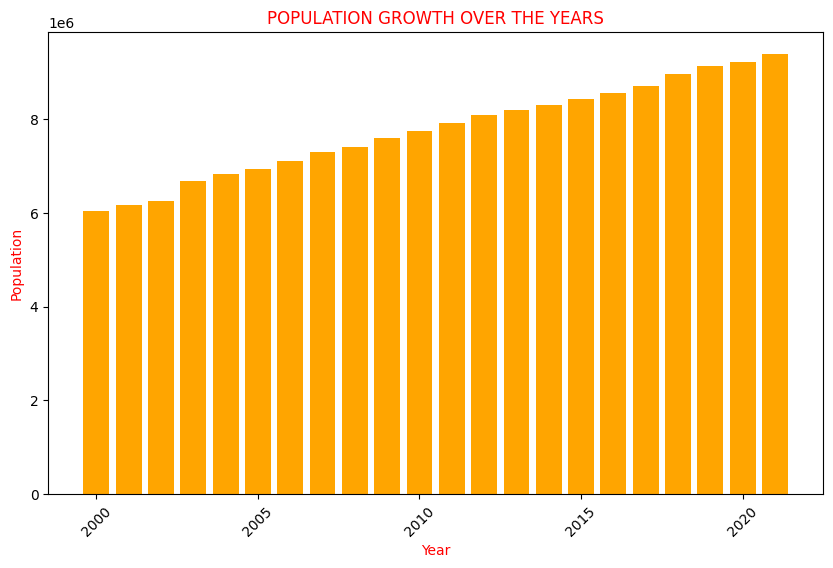

In [ ]:
# Create a bar plot to visualize Population Growth Over the Years:
plt.figure(figsize=(10, 6))
plt.bar(df_1['Year'], df_1['Population'], color='orange')

#Give title and labels to the axises:
plt.title('Population Growth Over the Years'.upper(),color= 'r')
plt.xlabel('Year',color= 'r')
plt.ylabel('Population',color= 'r')
plt.xticks(rotation=45)
plt.show()

GDP Growth (%) Over the Years

In [ ]:
#Plot #Comparision line chart of GDP in % over years of israel and palestine:
fig = px.line(df_1, x='Year', y='GDP Growth Rate (%)', color='Country', markers=True, title = 'GDP Growth (%) Over the Years')
fig.show()

In [ ]:
#Extracting israel data:
israel_df = df_1[df_1['Country']=="Israel"]
israel_gdp= israel_df['GDP Growth Rate (%)']

#Extracting plasestine data:
palestine_df= df_1[df_1['Country']=="Palestine"]
palestine_gdp= palestine_df['GDP Growth Rate (%)']

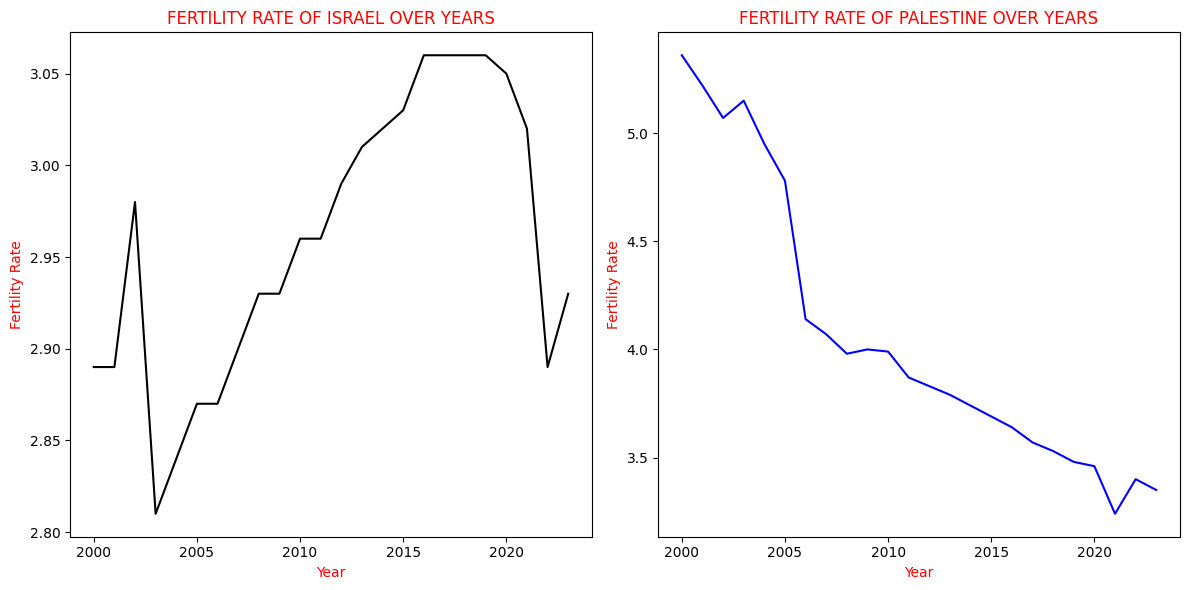

In [ ]:
#Plot Fertility rate over years:
#Set figure size:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

#Plot line chart and accordingly set parameter like color:
plt.plot(israel_df['Year'],israel_df['Fertility Rate'],color='black')

#Give title and labels to axis:
plt.title('Fertility Rate of israel over years'.upper(),color= 'r')
plt.xlabel('Year',color= 'r')
plt.ylabel('Fertility Rate',color= 'r')

plt.subplot(1, 2, 2)

#Plot line chart and accordingly set parameter like color:
plt.plot(palestine_df['Year'],palestine_df['Fertility Rate'],color='blue')

#Give title and labels to axis:
plt.title('Fertility Rate of palestine over years'.upper(),color= 'r')
plt.xlabel('Year',color= 'r')
plt.ylabel('Fertility Rate',color= 'r')

plt.tight_layout()
plt.show()


* The above figure have two line charts of fertility rate over the years. 1st represents it for israel and 2nd for palestine.


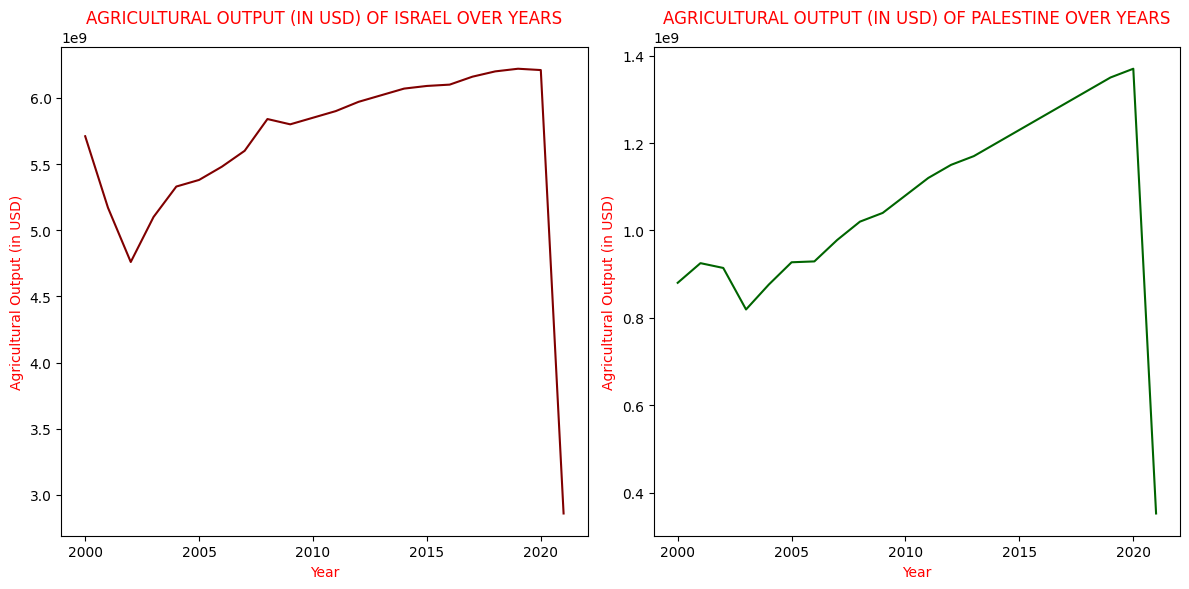

In [ ]:
#Plot Agricultural output over years:
#Set figure size:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

#Plot line chart and accordingly set parameter like color:
plt.plot(israel_df['Year'],israel_df['Agricultural Output (in USD)'],color='maroon')

#Give title and labels to axis:
plt.title('Agricultural Output (in USD) of israel over years'.upper(),color='r')
plt.xlabel('Year',color= 'r')
plt.ylabel('Agricultural Output (in USD)',color='r')

plt.subplot(1, 2, 2)

#Plot line chart and accordingly set parameter like color:
plt.plot(palestine_df['Year'],palestine_df['Agricultural Output (in USD)'],color='darkgreen')

#Give title and labels to axis:
plt.title('Agricultural Output (in USD) of palestine over years'.upper(),color= 'r')
plt.xlabel('Year',color= 'r')
plt.ylabel('Agricultural Output (in USD)',color= 'r')

plt.tight_layout()
plt.show()


* The above figure have two line charts of Agricultural output over the years. 1st represents it for israel and 2nd for palestine.
* In both israel and palestine it is decreasing from 2020-2021.
